<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA-and-pre-processing" data-toc-modified-id="EDA-and-pre-processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA and pre-processing</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistics-(data-shape,-balance,-etc)" data-toc-modified-id="Descriptive-statistics-(data-shape,-balance,-etc)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Descriptive statistics (data shape, balance, etc)</a></span></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data pre-processing</a></span></li></ul></li><li><span><a href="#ML-template-starts---training-session" data-toc-modified-id="ML-template-starts---training-session-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ML template starts - training session</a></span><ul class="toc-item"><li><span><a href="#Training-model-(LGBM)-with-stratisfied-CV" data-toc-modified-id="Training-model-(LGBM)-with-stratisfied-CV-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Training model (LGBM) with stratisfied CV</a></span></li></ul></li><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model evaluation</a></span><ul class="toc-item"><li><span><a href="#Plot-of-the-CV-folds---F1-macro-and-F1-for-the-positive-class" data-toc-modified-id="Plot-of-the-CV-folds---F1-macro-and-F1-for-the-positive-class-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plot of the CV folds - F1 macro and F1 for the positive class</a></span></li><li><span><a href="#Scikit-learn---Classification-report" data-toc-modified-id="Scikit-learn---Classification-report-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Scikit learn - Classification report</a></span></li><li><span><a href="#ROC-curve-with-AUC" data-toc-modified-id="ROC-curve-with-AUC-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>ROC curve with AUC</a></span></li><li><span><a href="#Confusion-Matrix-plot-(normalized-and-with-absolute-values)" data-toc-modified-id="Confusion-Matrix-plot-(normalized-and-with-absolute-values)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Confusion Matrix plot (normalized and with absolute values)</a></span></li><li><span><a href="#Feature-Importance-plot" data-toc-modified-id="Feature-Importance-plot-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Feature Importance plot</a></span></li><li><span><a href="#Correlations-analysis-(on-top-features)" data-toc-modified-id="Correlations-analysis-(on-top-features)-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Correlations analysis (on top features)</a></span></li><li><span><a href="#Anomaly-detection-on-the-training-set-(on-top-features-alone)" data-toc-modified-id="Anomaly-detection-on-the-training-set-(on-top-features-alone)-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Anomaly detection on the training set (on top features alone)</a></span></li><li><span><a href="#Data-leakage-test" data-toc-modified-id="Data-leakage-test-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Data leakage test</a></span></li></ul></li></ul></div>

In [1]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd 
import numpy as np
from pandas_summary import DataFrameSummary
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
import octopus_ml as oc 
from sklearn.metrics import classification_report
%matplotlib inline
import seaborn as sns


In [2]:
XY_df=pd.read_csv('../datasets/kaggle_mortality.csv')

# EDA and pre-processing 

## Descriptive statistics (data shape, balance, etc)

In [3]:
XY_df.shape

(91713, 186)

In [4]:
XY_df.head(3)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

### Target distribution

In [5]:
XY_df['hospital_death'].value_counts()

0    83798
1    7915 
Name: hospital_death, dtype: int64

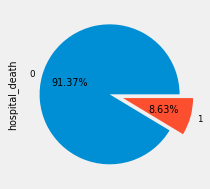

In [6]:
oc.target_pie(XY_df,'hospital_death')

### Selected features vs target historgrams 

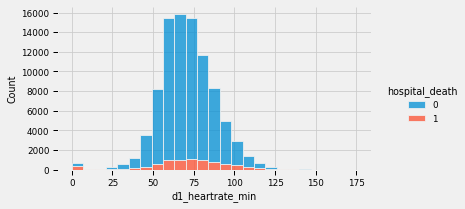

In [7]:
oc.hist_target(XY_df, 'd1_heartrate_min', 'hospital_death')

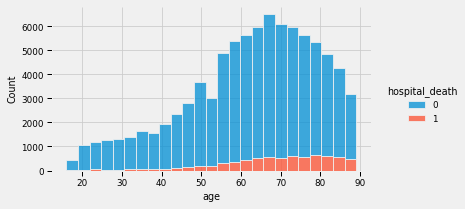

In [8]:
oc.hist_target(XY_df, 'age', 'hospital_death')

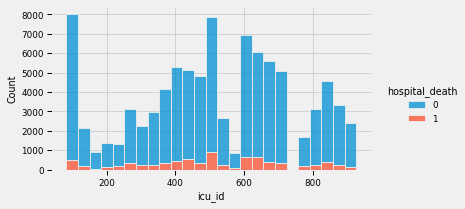

In [9]:
oc.hist_target(XY_df, 'icu_id', 'hospital_death')

### Data summary - and missing values analysis

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
count,91713,91713,91713,91713,87485,88284,91713,NaN,NaN,90379,NaN,NaN,91713,NaN,NaN,91713,91713,88993,37334,90051,90612,91713,90998,33579,72451,72860,20845,89812,89812,90676,89812,80677,90835,71835,90998,90719,20845,20845,20845,20845,90479,73113,87605,42715,90998,69701,23729,23729,91548,91548,90673,90673,91568,91568,23936,23936,91493,91493,90234,90234,91328,91328,91380,91380,23754,23754,91554,91554,90686,90686,89389,89389,16785,16785,88094,88094,84363,84363,88923,88923,16869,16869,87074,87074,82629,82629,87356,87356,87528,87528,16798,16798,88102,88102,84372,84372,69981,69981,42617,42617,38040,38040,81199,81199,78644,78644,81544,81544,85906,85906,76642,76642,79566,79566,80059,80059,33772,33772,23317,23317,78269,78269,82128,82128,81518,81518,78539,78539,7889,7889,7094,7094,16622,16622,15850,15850,16756,16756,39099,39099,15619,15619,18590,18590,18293,18293,33772,33772,7344,7344,16040,16040,19611,19611,19096,19096,15760,15760,32442,32442,31590,31590,32451,32451,25705,25705,

<AxesSubplot:>

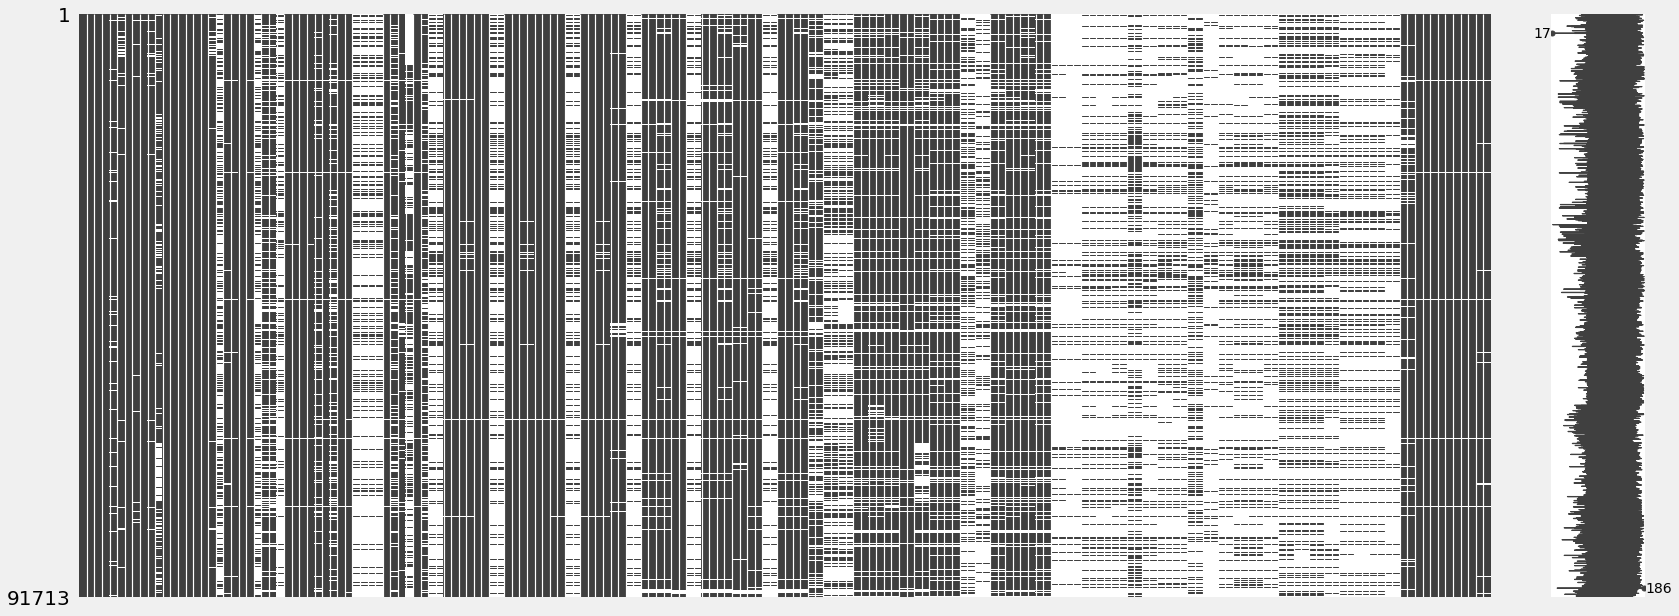

In [10]:
import missingno as msno
from pandas_summary import DataFrameSummary
dfs = DataFrameSummary(XY_df)
dfs.summary()
msno.matrix(XY_df)

## Data pre-processing 

In [11]:
features=XY_df.columns.to_list()
print ('number of features ', len(features))

number of features  186


In [12]:
features_remove=['encounter_id','patient_id','hospital_death']
for f in features_remove:
    features.remove(f)

In [13]:
# Categorical features pre-proccesing  
cat_list ,XY_df=oc.cat_features_proccessing(XY_df)
print (cat_list)

['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']


In [14]:
X=XY_df[features]
y=XY_df['hospital_death']

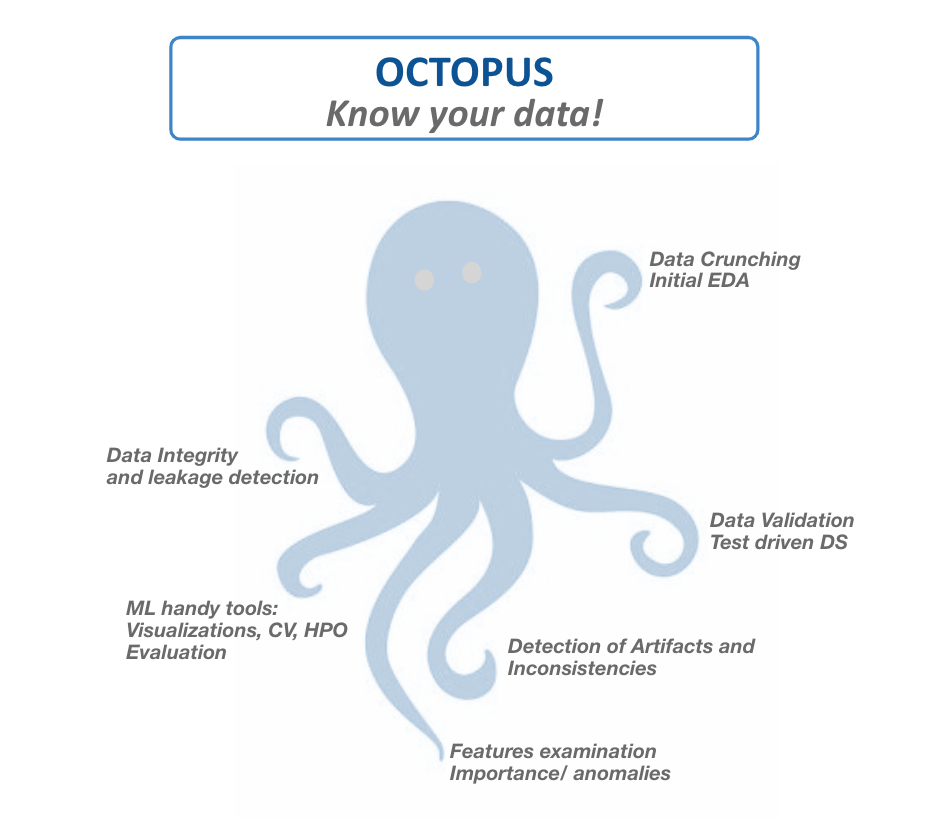

In [15]:
from IPython.display import Image
Image("../images/octopus_know_your_data.PNG", width=600, height=600)

In [16]:
XY_sampled=oc.sampling(XY_df,'hospital_death',5000)

number of positive instances: 7915 
number of negative instance :  83798
new dataset shape:  (12915, 186)
Method Name       : sampling
Current memory usage: 18.766211MB
Peak                : 121.594595MB
Total time taken:   198.670 ms 


# ML template starts - training session 

## Training model (LGBM) with stratisfied CV 

In [17]:
params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'auc',
        'learning_rate': 0.01,
        'subsample': 1,
        'colsample_bytree': 0.2,
        'reg_alpha': 3,
        'reg_lambda': 1,
        'scale_pos_weight': 9,
        'n_estimators': 5000,
        'max_depth': -1,
        'seed':100
        #'verbose': -1,
        #'categorical_feature': 'auto'
        # 'metric': 'auc',
        # 'scale_pos_weight':0.1,
        # 'learning_rate': 0.02,
        # 'num_boost_round':2000,
        # "min_sum_hessian_in_leaf":1,
        # 'max_depth' : 100,
        # "bagging_freq": 2,
        # "num_leaves":31,
        # "bagging_fraction" : 0.4,
        # "feature_fraction" : 0.05
}

clf,arr_f1_weighted,arr_f1_macro,arr_f1_positive,prediction_folds,preds_folds,y_folds= oc.cv(X,y,0.1,3000,shuffle=True,params=params)

0it [00:00, ?it/s]

[LightGBM] [Info] Number of positive: 6332, number of negative: 67038
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075971 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25635
[LightGBM] [Info] Number of data points in the train set: 73370, number of used features: 182
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.086302 -> initscore=-2.359643
[LightGBM] [Info] Start training from score -2.359643


1it [00:21, 21.58s/it]

[LightGBM] [Info] Number of positive: 6332, number of negative: 67038
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.104479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25625
[LightGBM] [Info] Number of data points in the train set: 73370, number of used features: 182
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.086302 -> initscore=-2.359643
[LightGBM] [Info] Start training from score -2.359643


2it [00:42, 21.40s/it]

[LightGBM] [Info] Number of positive: 6332, number of negative: 67038
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25640
[LightGBM] [Info] Number of data points in the train set: 73370, number of used features: 182
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.086302 -> initscore=-2.359643
[LightGBM] [Info] Start training from score -2.359643


3it [01:11, 23.73s/it]

[LightGBM] [Info] Number of positive: 6332, number of negative: 67039
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076969 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25653
[LightGBM] [Info] Number of data points in the train set: 73371, number of used features: 182
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.086301 -> initscore=-2.359658
[LightGBM] [Info] Start training from score -2.359658


4it [01:32, 22.84s/it]

[LightGBM] [Info] Number of positive: 6332, number of negative: 67039
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.103452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25630
[LightGBM] [Info] Number of data points in the train set: 73371, number of used features: 182
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.086301 -> initscore=-2.359658
[LightGBM] [Info] Start training from score -2.359658


5it [01:52, 22.47s/it]

Method Name       : cv
Current memory usage: 5.124197MB
Peak                : 453.330765MB
Total time taken:   112355.785 ms 


# Model evaluation 

### Plot of the CV folds - F1 macro and F1 for the positive class 
(in this case it's an unbalanced dataset)

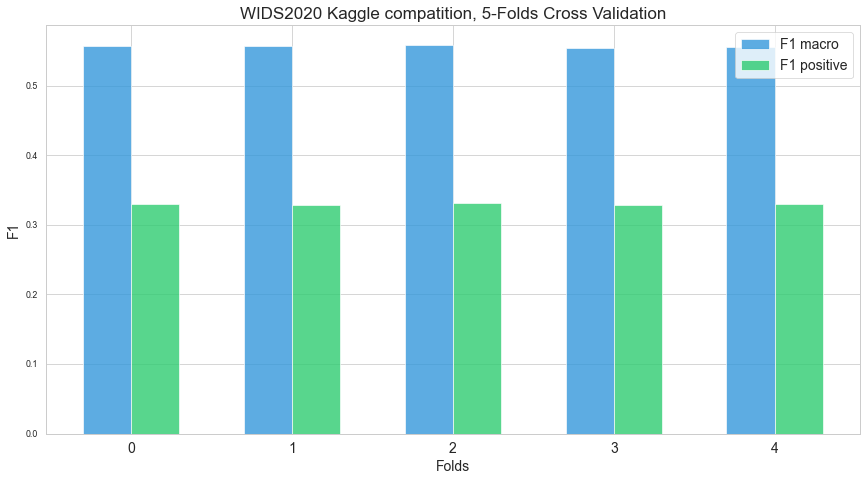

In [18]:
oc.cv_plot(arr_f1_weighted,arr_f1_macro,arr_f1_positive,'WIDS2020 Kaggle compatition')

## Scikit learn - Classification report 

In [19]:
print(classification_report(y_folds, prediction_folds))

              precision    recall  f1-score   support

           0       0.99      0.65      0.78     83798
           1       0.20      0.93      0.33      7915

    accuracy                           0.67     91713
   macro avg       0.60      0.79      0.56     91713
weighted avg       0.92      0.67      0.74     91713



## ROC curve with AUC

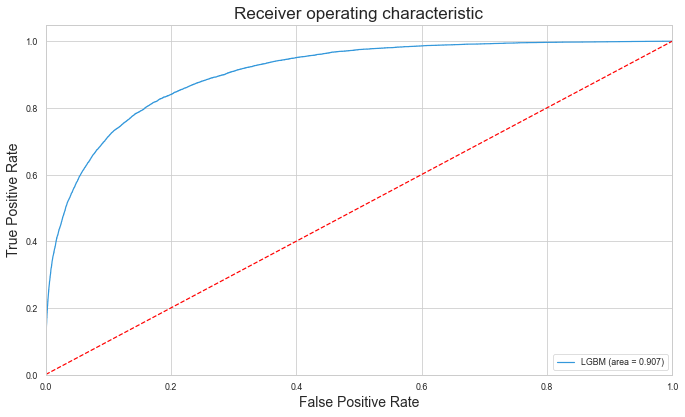

In [20]:
oc.roc_curve_plot(y_folds,preds_folds)

## Confusion Matrix plot (normalized and with absolute values) 

<Figure size 432x288 with 0 Axes>

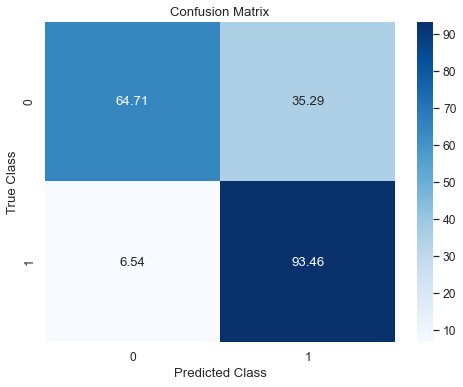

<Figure size 432x288 with 0 Axes>

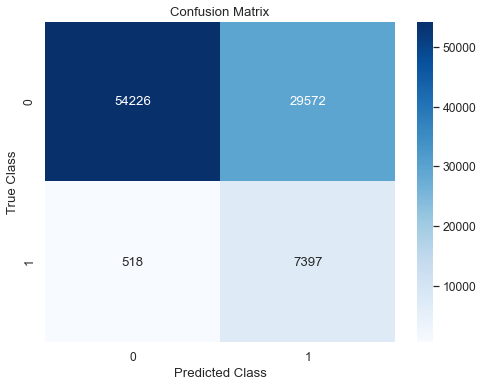

In [21]:
oc.confusion_matrix_plot(y_folds,prediction_folds)

## Feature Importance plot 

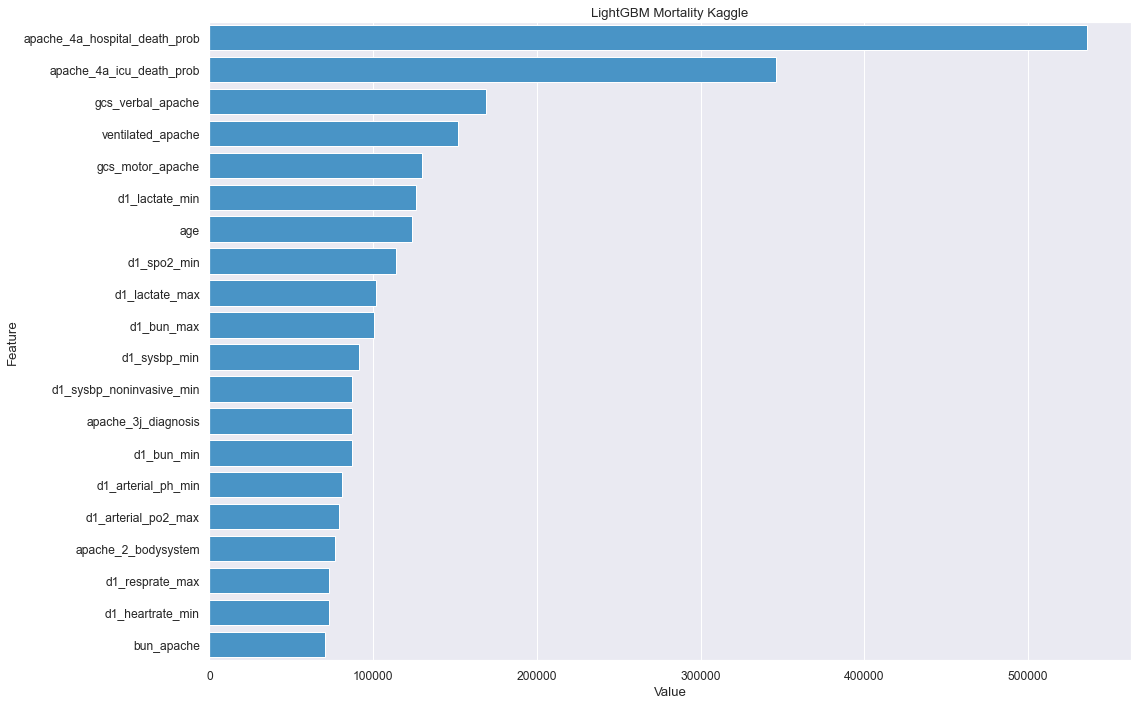

In [22]:
feature_imp_list=oc.plot_imp(clf,X,'LightGBM Mortality Kaggle',num=20)

In [23]:
top_features=feature_imp_list.sort_values(by='Value', ascending=False).head(20)

In [24]:
top_features

,Value,Feature
171,535876.716645,apache_4a_hospital_death_prob
172,346325.674820,apache_4a_icu_death_prob
27,168614.263725,gcs_verbal_apache
41,151988.522101,ventilated_apache
25,129663.055195,gcs_motor_apache
116,126158.822219,d1_lactate_min
1,123964.845595,age
60,114204.442367,d1_spo2_min
115,101504.979184,d1_lactate_max
99,100641.783117,d1_bun_max


## Correlations analysis (on top features)

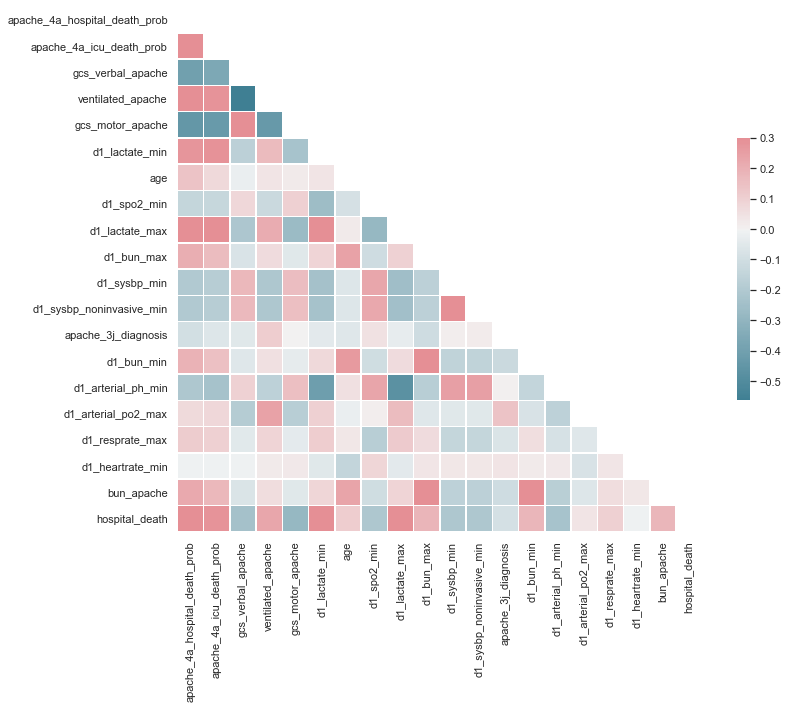

In [26]:
list_for_correlations=top_features['Feature'].to_list()
list_for_correlations.append('hospital_death')
oc.correlations(XY_df,list_for_correlations)

## Data leakage test 

In [27]:
oc.data_leakage(X,top_features['Feature'].to_list())

->  Passed the data leakage test - no duplicate intstances detected 
Method Name       : data_leakage
Current memory usage: 0.380243MB
Peak                : 32.270963MB
Total time taken:   62.554 ms 
